In [2]:
import numpy as np

from utils.features import prepare_for_training

#### 涉及的点：  
1.@staticmethod 静态方法（与实例无关，主要是类的逻辑）    
2.np.dot的维数要求  
3.在方法中调用参数的过程（self.gradient_step 中的 self.theta 中的运用）  
4.在cost_function中，cost是一个 1*1 的二维数组，形如 [[value]]，故需cost[0][0]  
5.在使用变量时，何时要用self. (使用的是class的属性时)，何时不用加(使用的是该方法中传入的参数时)

In [3]:
class LinearRegression:

    
    def __init__(self, data, labels, polynomial_degree=0, sinusoid_degree=0, normalize_data=True):
        """
        1.对数据进行预处理操作
        2.先得到所有的特征个数
        3.初始化参数矩阵
        """
        data_processed, features_mean, features_deviation = prepare_for_training(data, polynomial_degree, sinusoid_degree, normalize_data=True)

        self.data = data_processed
        self.labels = labels
        self.features_mean = features_mean
        self.features_deviation = features_deviation
        self.polynomial_degree = polynomial_degree
        self.sinusoid_degree = sinusoid_degree
        self.normalize_data = normalize_data
        
        number_features = self.data.shape[1]
        self.theta = np.zeros((number_features, 1))

    @staticmethod
    def hypothesis(data, theta):
        prediction = np.dot(data, theta)
        return prediction
    
    def gradient_step(self, alpha):
        """
        梯度下降参数更新计算方法，并且是矩阵计算
        """
        num_examples = self.data.shape[0]
        prediction = LinearRegression.hypothesis(self.data, self.theta)
        delta = prediction - self.labels
        theta = self.theta
        # 注意：点积的乘法！！
        # theta是列向量
        theta = theta - alpha * (1/num_examples) * np.dot(delta.T, self.data).T
        self.theta = theta

    def cost_function(self, data, labels):
        """
        损失计算方法
        """
        num_examples = data.shape[0]
        delta = LinearRegression.hypothesis(data, self.theta) - labels
        cost = np.dot(delta.T, delta) / (2 * num_examples)
        
        # 得到的cost是一个 1*1 的二维数组，形如 [[value]]
        return cost[0][0] 
    
    def gradient_descent(self, alpha, num_iterations=500):
        """
        实际迭代模块，会迭代num_iterations次
        """
        cost_history = []
        # 使用 _
        for _ in range(num_iterations):
            self.gradient_step(alpha)
            cost_history.append(self.cost_function(self.data, self.labels))
        
        return cost_history
            
    def train(self, alpha, num_iterations=500):
        """
        训练模块，执行梯度下降
        """
        cost_history = self.gradient_descent(alpha, num_iterations)
        return self.theta, cost_history   

    # 测试test
    def get_cost(self, data, labels):
        data_processed = prepare_for_training(data, self.polynomial_degree, self.sinusoid_degree, self.normalize_data)[0]
        return self.cost_function(data_processed, labels)

    def predict(self, data):
        """
        用训练好的参数模型去预测得到回归值结果
        """
        data_processed = prepare_for_training(data, self.polynomial_degree, self.sinusoid_degree, self.normalize_data)[0]
        predictions = LinearRegression.hypothesis(data_processed, self.theta)
        return predictions

### 下面都是单变量的实现

In [4]:
import pandas as pd

data = pd.read_csv('./data/world-happiness-report-2017.csv')

# 得到训练和测试数据
train_data = data.sample(frac=0.8)
test_data = data.drop(train_data.index)

input_param_name = 'Happiness.Score'
output_param_name = 'Economy..GDP.per.Capita.'

x_train = train_data[[input_param_name]].values
y_train = train_data[[output_param_name]].values
# y_train = train_data[output_param_name].values.reshape(-1, 1)

x_test = test_data[[input_param_name]].values
y_test = test_data[[output_param_name]].values

In [5]:
num_iterations = 500
learning_rate = 0.01

# 这是一个类
linear_regression = LinearRegression(x_train, y_train)
theta, cost_history = linear_regression.train(learning_rate, num_iterations)
print('开始的损失：', cost_history[0])
print('训练后的损失：', cost_history[-1])

开始的损失： 0.5452119863414547
训练后的损失： 0.031323844056219644


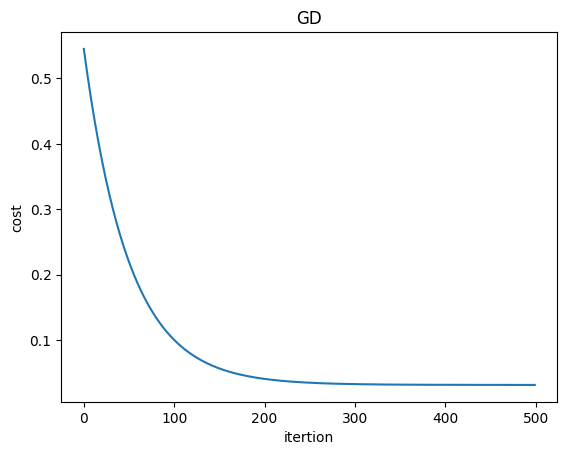

In [6]:
import matplotlib.pyplot as plt

plt.plot(range(num_iterations), cost_history)
plt.xlabel('itertion')
plt.ylabel('cost')
plt.title('GD')
plt.show()

#### 做测试

In [57]:
predictions_num = 100
# x_predictions = np.linspace(x_train.min(), x_train.max(), predictions_num).reshape(-1, 1)
x_predictions = x_test
y_predictions = linear_regression.predict(x_test)

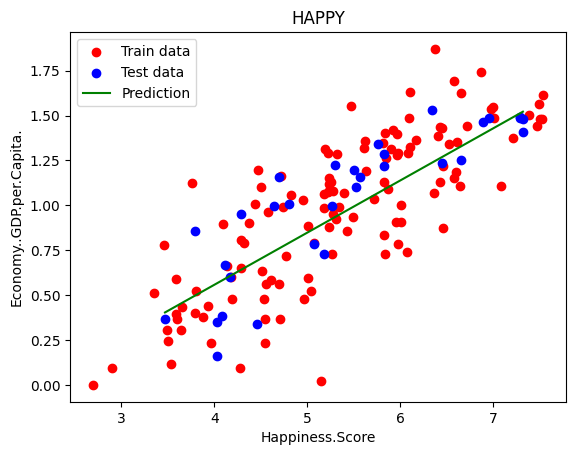

In [55]:
plt.scatter(x_train, y_train, c='r', label='Train data')
plt.scatter(x_test, y_test, c='b', label='Test data')
plt.plot(x_predictions, y_predictions, c='g', label='Prediction')
plt.xlabel(input_param_name)
plt.ylabel(output_param_name)
plt.title('HAPPY')
plt.legend()
plt.show()

##### 矩阵相乘，必须要满足维数要求

In [16]:
alpha = np.array([[1, 2, 3], [4, 5, 7], [7, 8, 9], [2, 3, 6]])
beta = np.array([[2, 3], [7, 3], [5, 7], [3, 8]])
print(np.dot(alpha.T, beta))

[[ 71  80]
 [ 88 101]
 [118 141]]
